In [1]:
import pandas as pd
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


# PRACTICING WITH PEYTON

In [2]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [15]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.180847,7.411405,8.944298,6.839125,7.531874,1.018428,1.018428,1.018428,0.048295,0.048295,0.048295,0.970133,0.970133,0.970133,0.0,0.0,0.0,8.199274
3266,2017-01-16,7.179809,7.800200,9.251700,6.836283,7.532590,1.344435,1.344435,1.344435,0.352287,0.352287,0.352287,0.992148,0.992148,0.992148,0.0,0.0,0.0,8.524244
3267,2017-01-17,7.178771,7.571701,9.065047,6.833441,7.533305,1.132844,1.132844,1.132844,0.119624,0.119624,0.119624,1.013220,1.013220,1.013220,0.0,0.0,0.0,8.311615
3268,2017-01-18,7.177733,7.406725,8.828665,6.830598,7.534021,0.966499,0.966499,0.966499,-0.066647,-0.066647,-0.066647,1.033146,1.033146,1.033146,0.0,0.0,0.0,8.144232
3269,2017-01-19,7.176695,7.408005,8.921640,6.827756,7.534693,0.979396,0.979396,0.979396,-0.072284,-0.072284,-0.072284,1.051680,1.051680,1.051680,0.0,0.0,0.0,8.156091


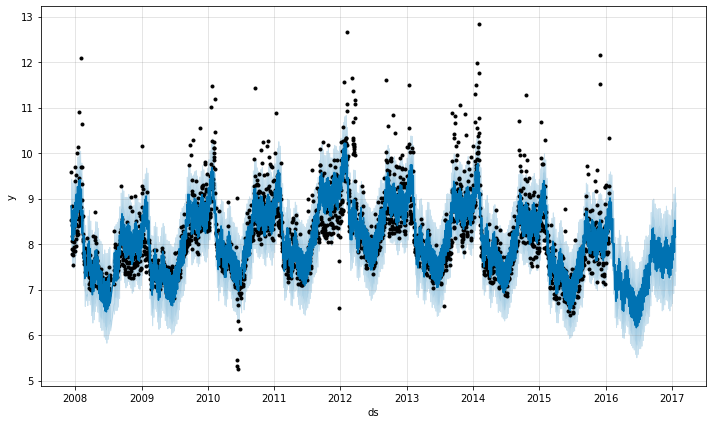

In [16]:
fig1 = m.plot(forecast)

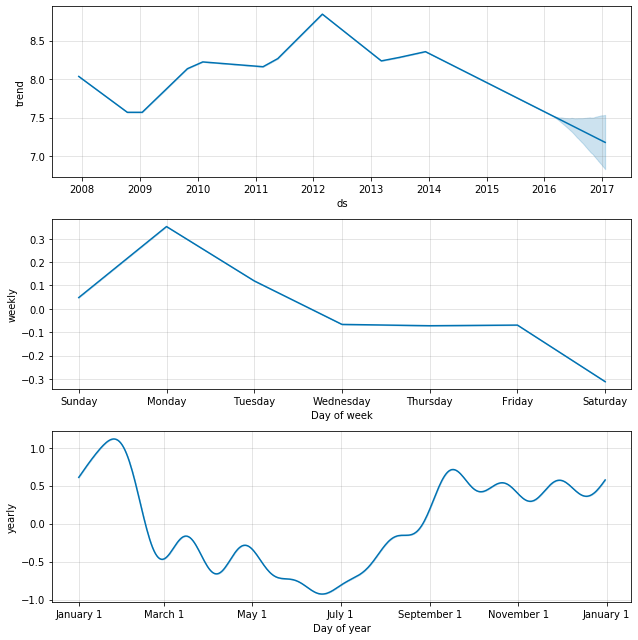

In [17]:
fig2 = m.plot_components(forecast)

# PRACTICING WITH ZILLOW

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

In [0]:
CA = df[df.State == 'CA']
LA = CA[CA.CountyName == 'Los Angeles County']
mine = LA[LA.RegionName == 90039]

In [0]:
df = mine.copy()
df_t = df.loc[:, '1997-01':'2018-12'].T

In [50]:
df = df_t.copy()
df.reset_index(inplace=True)
# df['ds'] = df[df.columns[1]] + '-01'
df.columns = ['ds','y']
# df['ds'] = df['ds'] + '-01'
df.head()

,ds,y
0,1997-01,147935.0
1,1997-02,148799.0
2,1997-03,149280.0
3,1997-04,149552.0
4,1997-05,149320.0


In [39]:
df.tail()

,ds,y
259,2018-08-01,868462.0
260,2018-09-01,879218.0
261,2018-10-01,888896.0
262,2018-11-01,903051.0
263,2018-12-01,914058.0


In [41]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
624,2019-11-27
625,2019-11-28
626,2019-11-29
627,2019-11-30
628,2019-12-01


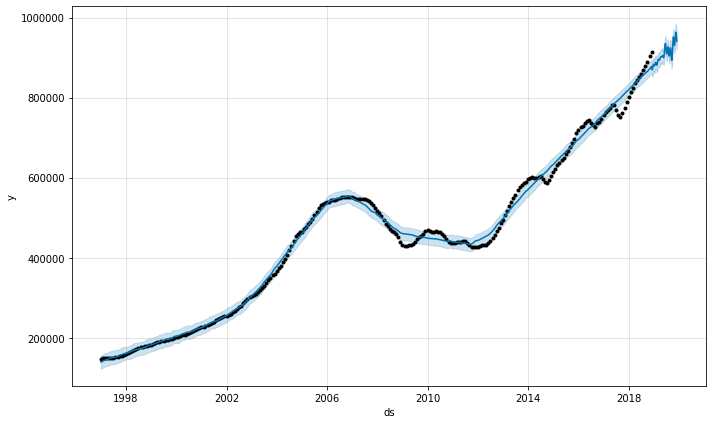

In [42]:
forecast = m.predict(future)
forecast.tail()

fig1 = m.plot(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


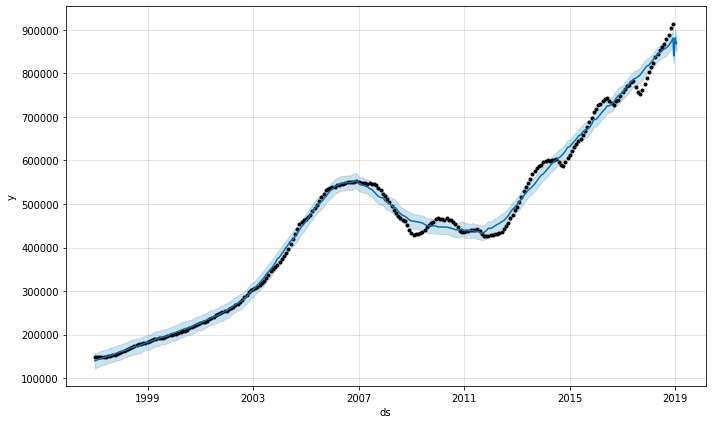

In [59]:
# df = pd.read_csv('../examples/example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=48)
fcst = m.predict(future)
fig = m.plot(fcst)

In [60]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1997-01-01,140047.491970,122027.912573,157614.163950,140047.491970,140047.491970,-0.001828,-0.001828,-0.001828,-0.001828,-0.001828,-0.001828,0.0,0.0,0.0,139791.432687
1,1997-02-01,141835.867074,124906.258504,157782.842927,141835.867074,141835.867074,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,-0.000150,0.0,0.0,0.0,141814.531781
2,1997-03-01,143451.173619,127161.739383,161275.553479,143451.173619,143451.173619,0.001271,0.001271,0.001271,0.001271,0.001271,0.001271,0.0,0.0,0.0,143633.507654
3,1997-04-01,145239.548723,128929.313559,162460.028359,145239.548723,145239.548723,0.002450,0.002450,0.002450,0.002450,0.002450,0.002450,0.0,0.0,0.0,145595.329110
4,1997-05-01,146970.234308,130564.958568,164423.263425,146970.234308,146970.234308,0.003117,0.003117,0.003117,0.003117,0.003117,0.003117,0.0,0.0,0.0,147428.370071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2019-01-14,884823.065837,851158.507747,884766.840149,884823.065837,884823.065837,-0.018989,-0.018989,-0.018989,-0.018989,-0.018989,-0.018989,0.0,0.0,0.0,868020.766237
308,2019-01-15,884994.214243,851266.206249,884112.892932,884994.214243,884994.214243,-0.019171,-0.019171,-0.019171,-0.019171,-0.019171,-0.019171,0.0,0.0,0.0,868027.822692
309,2019-01-16,885165.362649,851158.694172,885936.991743,885165.362649,885165.362649,-0.019036,-0.019036,-0.019036,-0.019036,-0.019036,-0.019036,0.0,0.0,0.0,868315.223924
310,2019-01-17,885336.511055,851828.725111,886305.805431,885336.511055,885336.511055,-0.018594,-0.018594,-0.018594,-0.018594,-0.018594,-0.018594,0.0,0.0,0.0,868874.659050


In [61]:
len(df)

264

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


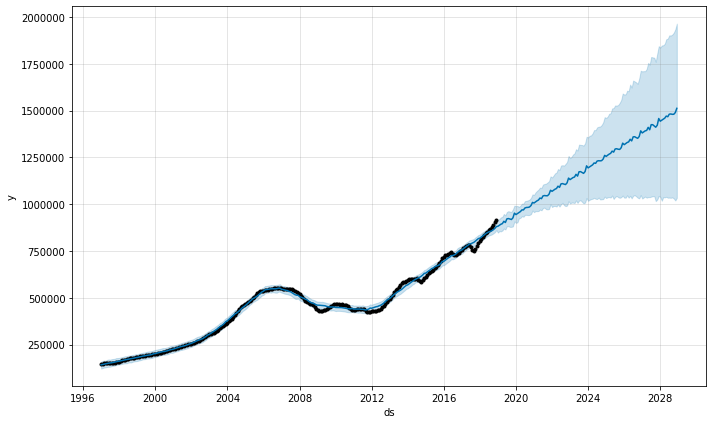

In [62]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


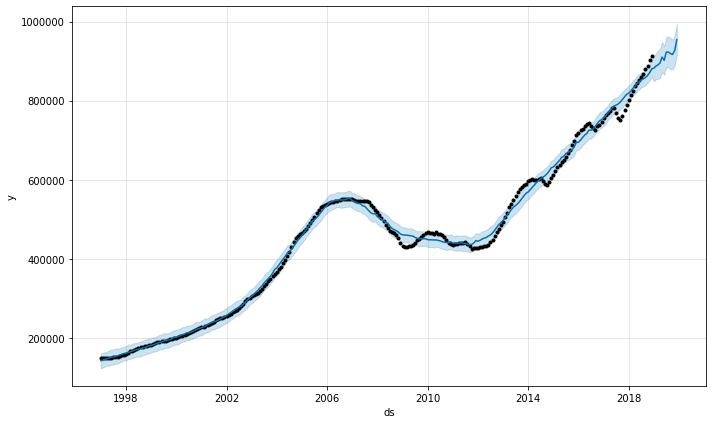

In [63]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=264).fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)


In [64]:
df

,ds,y
0,1997-01,147935.0
1,1997-02,148799.0
2,1997-03,149280.0
3,1997-04,149552.0
4,1997-05,149320.0
...,...,...
259,2018-08,868462.0
260,2018-09,879218.0
261,2018-10,888896.0
262,2018-11,903051.0


In [65]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
271,2019-07-31
272,2019-08-31
273,2019-09-30
274,2019-10-31
275,2019-11-30


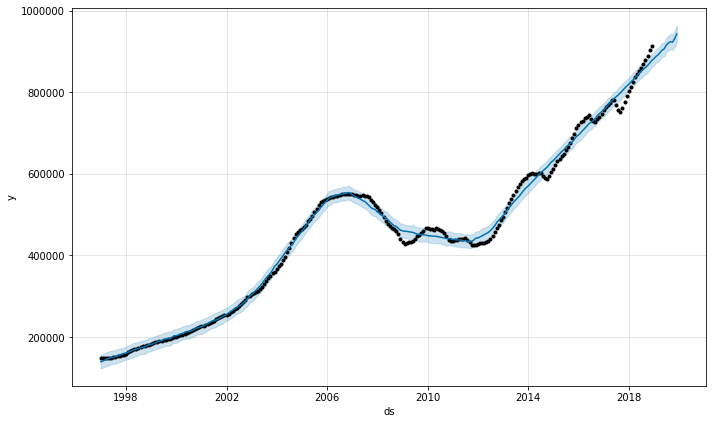

In [66]:
forecast = m.predict(future)
forecast.tail()

fig1 = m.plot(forecast)

In [67]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
271,2019-07-31,918473.369818,903229.705722,938597.591295,914617.442988,923475.109588,2323.096416,2323.096416,2323.096416,2323.096416,2323.096416,2323.096416,0.0,0.0,0.0,920796.466234
272,2019-08-31,923759.835346,905453.880237,942815.743464,918704.391028,930597.430958,316.944131,316.944131,316.944131,316.944131,316.944131,316.944131,0.0,0.0,0.0,924076.779476
273,2019-09-30,928875.769727,903844.334617,942383.881488,922547.571801,937204.975889,-5867.834013,-5867.834013,-5867.834013,-5867.834013,-5867.834013,-5867.834013,0.0,0.0,0.0,923007.935714
274,2019-10-31,934162.235255,911712.443077,951568.600562,926623.185068,944022.816271,-1841.329851,-1841.329851,-1841.329851,-1841.329851,-1841.329851,-1841.329851,0.0,0.0,0.0,932320.905404
275,2019-11-30,939278.169636,922523.753294,963866.392254,930060.040402,950700.180449,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,3670.706646,0.0,0.0,0.0,942948.876282
